In [1]:
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
annFile = r'D:\Side_project\MedSAM\data\gastrointestinal_coco\coco_annotation\train_annotation.json'

In [3]:
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


In [5]:
catIds = coco.getCatIds(catNms=['bleeding'])

imgId=[1]
img = coco.loadImgs(imgId)[0]
img

{'file_name': 'img- (1).png', 'height': 224, 'width': 224, 'id': 1}

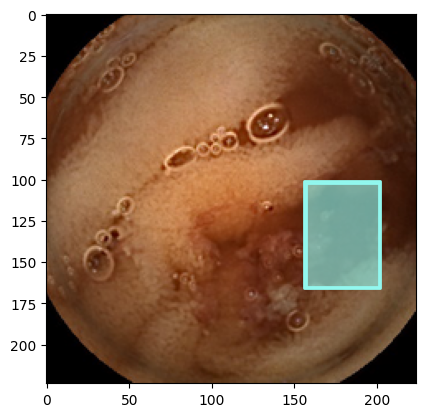

In [6]:
plt.imshow(plt.imread(r'D:\Side_project\MedSAM\data\gastrointestinal_coco\train\img- (1).png'))
annIds = coco.getAnnIds(imgIds=img['id'],catIds=catIds,iscrowd=None) #catIds用于显示指定类别的标签
anns = coco.loadAnns(annIds)
coco.showAnns(anns, draw_bbox=True)
plt.savefig('a.png')

---

In [7]:
from pycocotools.coco import COCO

# 載入 COCO 格式的標記檔案
coco_annotation_file = r'D:\Side_project\MedSAM\data\gastrointestinal_coco\coco_annotation\train_annotation.json'  # 將路徑替換為你的標記檔案的路徑
coco = COCO(coco_annotation_file)

# 取得包含 instance segmentation 資訊的類別 ID 列表
category_ids = coco.getCatIds()

# 初始化框和 mask 的計數器
bbox_count = 0
mask_count = 0

# 逐類別計算框和 mask 的數量
for category_id in category_ids:
    # 取得指定類別的資訊
    category_info = coco.loadCats(category_id)[0]
    category_name = category_info['name']
    
    # 取得指定類別的標註 ID
    annotation_ids = coco.getAnnIds(catIds=[category_id])
    
    # 取得指定類別的所有標註
    annotations = coco.loadAnns(annotation_ids)
    
    # 計算框和 mask 的數量
    for annotation in annotations:
        bbox_count += 1  # 每個標註都有一個框
        mask_count += len(annotation['segmentation'])  # 每個標註可能有多個 mask（多邊形）
    
    print(f'類別 "{category_name}" 的框數量: {len(annotations)}')
    print(f'類別 "{category_name}" 的 mask 數量: {mask_count}')

# 總計
print('---')
print(f'總框數量: {bbox_count}')
print(f'總 mask 數量: {mask_count}')


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
類別 "bleeding" 的框數量: 1597
類別 "bleeding" 的 mask 數量: 1597
---
總框數量: 1597
總 mask 數量: 1597
